# PS 88 Week 3 Lab: Simulations and Pivotal Voters

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datascience import Table
%matplotlib inline

## Part 1: Plotting expected utility

Add some stuff about plotting the EU to voting as a function of p, b c

## Part 2: Simulating votes

How can we estimate the probability of a vote mattering? One route is to use probability theory, which in realistic settings (like the electoral college in the US) requires lots of complicated mathematical manipulation. Another way, which will often be faster and uses the tools you are learning in Data 8, is to run simulations.

As we will see throughout the class, simulation is an incredibly powerful tool that can be used for many purposes. For example, later in the class we will use simulation to see how different causal processes can produce similar data.

For now, we are going to use simulation to simulate the probability a vote matters. The general idea is simple. We will create a large number of "fake electorates" with parameters and randomness that we control, and then see how often an individual vote matters in these simulations. 

Before we get to voting, let's do a simple exercise as warmup. Suppose we want to simulate flipping a coin 10 times. To do this we can use the `random.binomial` function from `numpy` (imported here as `np`). This function takes two arguments: the number of flips (`n`) and the probability that a flip is "heads" (`p`). More generally, we often call $n$ the number of "trials" and $p$ the probability of "success".

The following line of code simulates flipping a "fair" (i.e., $p=.5$) coin 10 times. Run it a few times.

In [6]:
# First number argument is the number of times to flip, the second is the probability of a "heads"
np.random.binomial(n=10, p=.5)

6

We can simulate 100 coin flips at a time by changing the `n` argument to 100:

In [7]:
np.random.binomial(n=100, p=.5)

47

In the 2020 election, about 158.4 million people voted. This is a big number to have to keep typing, so let's define a variable: 

In [14]:
voters2020 = 158400000

**Question 2a. Write a line of code to simulate 158.4 million people flipping a coin and counting how many heads there are.**

In [15]:
# Code for 2a here
np.random.binomial(n=voters2020, p=.5)

79211701

Of course, we don't care about coin flipping per se, but we can think about this as the number of "yes" votes if we have n people who vote for a candidate with probability $p$. In the 2020 election, about 51.3% of the voters voted fro Joe Biden. Let's do a simulated version of the election: by running `np.random.binomial` with 160 million trials and a probability of "success" of 51.3%. 

**Question 2b. Write code for this trial**

In [16]:
# Code for 2b
np.random.binomial(n=voters2020, p=.513)

81261066

In reality, Biden won 81.3 million votes. 

**Question 2c. How close was your anser to the real election? Compare this to the cases where you flipped 10 coins at a time.**

*Answer to 2c here*

## Part 3. Pivotal votes.

Suppose that you are a voter in a population with 10 people who are equally likely to vote for candidate A or candidate B, and you prefer candidate A. If you turn out to vote, you will be pivotal if the other 10 are split evenly between the two candidates. How often will this happen?

We can answer this question by running a whole bunch of simulations where we effectively flip 10 coins and count how many heads there are. The following code does that (don't worry about the details here: we will cover this later.)

In [4]:
trials10 = [np.random.binomial(n=10, p=.5) for _ in range(10000)]

This created an array of 10,000 numbers "trials" where we simulate 10 voters who are equally likely to vote for A or B, and then count the number of A votes.

In [5]:
trials10

[6,
 4,
 3,
 5,
 4,
 5,
 7,
 4,
 3,
 5,
 2,
 5,
 7,
 6,
 4,
 5,
 4,
 6,
 5,
 5,
 4,
 6,
 5,
 3,
 4,
 6,
 6,
 6,
 4,
 2,
 1,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 6,
 7,
 6,
 4,
 6,
 7,
 4,
 5,
 5,
 6,
 6,
 6,
 7,
 5,
 2,
 7,
 6,
 4,
 4,
 5,
 3,
 4,
 5,
 2,
 7,
 3,
 4,
 5,
 4,
 2,
 8,
 6,
 7,
 4,
 6,
 5,
 4,
 3,
 3,
 8,
 5,
 2,
 4,
 6,
 5,
 7,
 6,
 7,
 3,
 2,
 5,
 4,
 6,
 5,
 5,
 6,
 4,
 5,
 6,
 6,
 5,
 6,
 6,
 4,
 6,
 3,
 6,
 3,
 9,
 5,
 3,
 6,
 6,
 8,
 9,
 7,
 7,
 6,
 6,
 4,
 5,
 4,
 5,
 5,
 6,
 3,
 7,
 6,
 6,
 6,
 4,
 3,
 5,
 2,
 5,
 3,
 5,
 3,
 5,
 5,
 6,
 5,
 5,
 6,
 4,
 8,
 6,
 9,
 5,
 4,
 7,
 2,
 4,
 5,
 6,
 3,
 7,
 5,
 5,
 3,
 6,
 4,
 6,
 8,
 6,
 7,
 3,
 3,
 3,
 5,
 6,
 4,
 5,
 4,
 4,
 4,
 8,
 3,
 7,
 5,
 2,
 3,
 6,
 4,
 6,
 4,
 7,
 6,
 4,
 3,
 4,
 6,
 6,
 6,
 4,
 7,
 7,
 5,
 4,
 3,
 6,
 2,
 4,
 6,
 8,
 6,
 5,
 2,
 7,
 5,
 6,
 7,
 4,
 2,
 7,
 5,
 5,
 6,
 7,
 5,
 5,
 4,
 4,
 4,
 6,
 4,
 5,
 8,
 7,
 4,
 5,
 6,
 5,
 6,
 3,
 4,
 5,
 6,
 7,
 4,
 5,
 5,
 5,
 4,
 3,
 5,
 5,
 6,
 4,
 4,
 1,
 6,


Let's put these in a table, and then make a histogram to see how often each trial number happens:

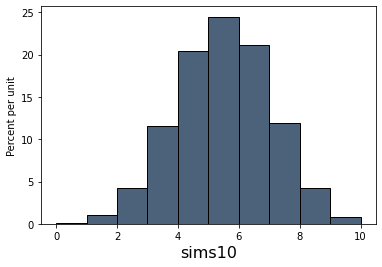

In [6]:
simtable = Table().with_column("sims10",trials10)
simtable.hist("sims10")

Now let's add a variable which indicates whether a new voter would be pivotal.

In [11]:
simtable = simtable.with_column("pivot10", simtable.column("sims10")==5)
simtable

sims10,pivot10
6,False
4,False
3,False
5,True
4,False
5,True
7,False
4,False
3,False
5,True


We can then easily count the number of trials where a voter was pivotal.

In [12]:
sum(simtable.column("pivot10"))

2448

And convert this to a percentage:

In [14]:
sum(simtable.column("pivot10"))/10000

0.2448

To streamline, we will now define a function which runs a simluation with population size n and probability of voting for candidate A of p. 

In [15]:
def one_pivot(n,p):
    return 1*(np.random.binomial(n=n,p=p)==n/2)

Let's see how the probability of being pivotal changes with a higher n

In [17]:
ntrials = 10000
piv_trials100 = [one_pivot(n=100, p=.5) for _ in range(ntrials)]
sum(piv_trials100)/ntrials

0.0786

Or a lower p

In [18]:
ntrials = 10000
piv_trials100 = [one_pivot(n=100, p=.4) for _ in range(ntrials)]
sum(piv_trials100)/ntrials

0.01

Do p=.6

## Part 5. Pivotal votes with groups

To learn about situations like the electoral college, let's do a simluation with groups.

In [18]:
ntrials = 10000
n1=50
n2=50
n3=50
p1=.4
p2=.5
p3=.6
group1 = [np.random.binomial(n=n1, p=p1) for _ in range(ntrials)]
group2 = [np.random.binomial(n=n2, p=p2) for _ in range(ntrials)]
group3 = [np.random.binomial(n=n3, p=p3) for _ in range(ntrials)] 
grouptrials = Table().with_columns("votes1",group1,
                                 "votes2", group2,
                                 "votes3",group3)
grouptrials

votes1,votes2,votes3
19,25,30
21,24,28
24,28,23
19,26,32
18,24,35
19,26,30
20,20,33
24,25,30
21,26,39
16,29,26


Creating a variable to check whether an individual voter would be pivotal if placed in each group.

In [23]:
grouptrials = grouptrials.with_columns("voter piv1", 1*(grouptrials.column("votes1")==n1/2),
                                       "voter piv2", 1*(grouptrials.column("votes2")==n2/2),
                                       "voter piv3", 1*(grouptrials.column("votes3")==n3/2))
grouptrials

votes1,votes2,votes3,group piv1,group piv2,group piv3,voter piv1,voter piv2,voter piv3
19,25,30,1,1,1,0,1,0
21,24,28,1,1,0,0,0,0
24,28,23,1,0,1,0,0,0
19,26,32,0,1,1,0,0,0
18,24,35,1,1,0,0,0,0
19,26,30,0,1,1,0,0,0
20,20,33,1,1,0,0,0,0
24,25,30,1,1,1,0,1,0
21,26,39,0,1,1,0,0,0
16,29,26,0,1,1,0,0,0


In [25]:
sum(grouptrials.column("voter piv1"))

426

In [20]:
sum(grouptrials.column("voter piv2"))

1089

In [21]:
sum(grouptrials.column("voter piv3"))

358

Now checking if the group is pivotal, i.e., if the group changing their vote changes which candidate wins the majority of groups. [Note: tricky stuff about ties here is importnat]

In [24]:
group1piv = 1*((grouptrials.column("votes2") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes2") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
group2piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
group3piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes2") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes2") <= n3/2))

grouptrials = grouptrials.with_columns("group piv1", group1piv,
                                       "group piv2", group2piv,
                                       "group piv3", group3piv)
grouptrials

votes1,votes2,votes3,group piv1,group piv2,group piv3,voter piv1,voter piv2,voter piv3
19,25,30,1,1,1,0,1,0
21,24,28,1,1,0,0,0,0
24,28,23,1,0,1,0,0,0
19,26,32,0,1,1,0,0,0
18,24,35,1,1,0,0,0,0
19,26,30,0,1,1,0,0,0
20,20,33,1,1,0,0,0,0
24,25,30,1,1,1,0,1,0
21,26,39,0,1,1,0,0,0
16,29,26,0,1,1,0,0,0


How often are the different groups pivotal?

In [23]:
sum(grouptrials.column("group piv1"))

5740

In [24]:
sum(grouptrials.column("group piv2"))

8961

In [25]:
sum(grouptrials.column("group piv3"))

5691

A voter will be pivitol "overall" if they are pivotal within the group and the group is pivotal in the election.

In [40]:
grouptrials = grouptrials.with_columns("overall piv1", 
                                      grouptrials.column("voter piv1")*grouptrials.column("group piv1"),
                                       "overall piv2", 
                                      grouptrials.column("voter piv2")*grouptrials.column("group piv2"),
                                       "overall piv3", 
                                      grouptrials.column("voter piv3")*grouptrials.column("group piv3"))

grouptrials

votes1,votes2,votes3,voter piv1,voter piv2,voter piv3,group piv1,group piv2,group piv3,overall piv1,overall piv2,overall piv3
22,24,32,0,0,0,1,1,0,0,0,0
16,25,30,0,1,0,1,1,1,0,1,0
17,23,26,0,0,0,1,1,0,0,0,0
22,23,31,0,0,0,1,1,0,0,0,0
19,15,25,0,0,1,1,1,0,0,0,0
19,25,30,0,1,0,1,1,1,0,1,0
23,30,32,0,0,0,0,1,1,0,0,0
27,24,32,0,0,0,1,0,1,0,0,0
27,23,33,0,0,0,1,0,1,0,0,0
19,22,33,0,0,0,1,1,0,0,0,0


In [27]:
sum(grouptrials.column("overall piv 1"))/ntrials, sum(grouptrials.column("overall piv 2"))/ntrials,  sum(grouptrials.column("overall piv 3")) /ntrials

(0.0246, 0.0997, 0.0204)

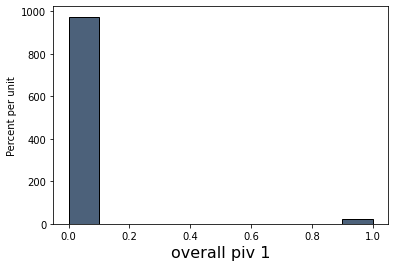

In [29]:
grouptrials.hist("overall piv 1")

In [32]:
pd.crosstab(grouptrials.column("voter piv1"), grouptrials.column("group piv1"))

col_0,0,1
row_0,,
0,4106,5494
1,154,246


In [34]:
pd.crosstab(grouptrials.column("voter piv1"), grouptrials.column("group piv1"), normalize=True)

col_0,0,1
row_0,,
0,0.4106,0.5494
1,0.0154,0.0246


Here is a function that ties it all together.

In [41]:
def maketable(n1=50, n2=50, n3=50, p1=.4, p2=.5, p3=.6, ntrials=1000):
    group1 = [np.random.binomial(n=n1, p=p1) for _ in range(ntrials)]
    group2 = [np.random.binomial(n=n2, p=p2) for _ in range(ntrials)]
    group3 = [np.random.binomial(n=n3, p=p3) for _ in range(ntrials)] 
    grouptrials = Table().with_columns("votes1",group1,
                                 "votes2", group2,
                                 "votes3",group3)
    grouptrials = grouptrials.with_columns("voter piv1", 1*(grouptrials.column("votes1")==n1/2),
                                       "voter piv2", 1*(grouptrials.column("votes2")==n2/2),
                                       "voter piv3", 1*(grouptrials.column("votes3")==n3/2))
    group1piv = 1*((grouptrials.column("votes2") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes2") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
    group2piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes3") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes3") <= n3/2))
    group3piv = 1*((grouptrials.column("votes1") <= n2/2)*(grouptrials.column("votes2") >= n3/2)+
   (grouptrials.column("votes1") >= n2/2)*(grouptrials.column("votes2") <= n3/2))
    grouptrials = grouptrials.with_columns("group piv1", group1piv,
                                       "group piv2", group2piv,
                                       "group piv3", group3piv)
    grouptrials = grouptrials.with_columns("overall piv1", 
                                      grouptrials.column("voter piv1")*grouptrials.column("group piv1"),
                                       "overall piv2", 
                                      grouptrials.column("voter piv2")*grouptrials.column("group piv2"),
                                       "overall piv3", 
                                      grouptrials.column("voter piv3")*grouptrials.column("group piv3"))
    return grouptrials

In [42]:
test = maketable()
test

votes1,votes2,votes3,voter piv1,voter piv2,voter piv3,group piv1,group piv2,group piv3,overall piv1,overall piv2,overall piv3
24,32,30,0,0,0,0,1,1,0,0,0
20,23,27,0,0,0,1,1,0,0,0,0
15,26,34,0,0,0,0,1,1,0,0,0
23,21,31,0,0,0,1,1,0,0,0,0
20,23,29,0,0,0,1,1,0,0,0,0
14,26,30,0,0,0,0,1,1,0,0,0
24,23,37,0,0,0,1,1,0,0,0,0
22,29,34,0,0,0,0,1,1,0,0,0
19,25,34,0,1,0,1,1,1,0,1,0
15,29,37,0,0,0,0,1,1,0,0,0


Do some stuff about when individuals are pivotal. 